## Read in the Data

In [1]:
# Imports and colors and numbers that won't change
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
#First year of data will not change, last year is not inclusive
min_data_year = 1880
max_data_year = 2025
female_color = 'xkcd:pink'
male_color = 'xkcd:light blue'
default_color = 'xkcd:periwinkle'
default_color2 = 'xkcd:grass green'
colors = ['xkcd:red','xkcd:orange','xkcd:mustard','xkcd:grass green', 'xkcd:light blue','xkcd:cerulean','xkcd:indigo', 
          'xkcd:lavender', 'xkcd:pink', 'xkcd:black', 'xkcd:tan', 'xkcd:grey blue']
generation_starts = {'Missionary' : 1880, 'Lost' : 1883, 'Greatest' : 1901, 'Silent' : 1928, 'Boomers' : 1946, 'Gen X' : 1965, 'Milennial' : 1981,
                     'Gen X' : 1997, 'Gen Alpha' : 2010}

In [2]:
# data = pd.DataFrame(columns = ['name', 'sex', 'total_count'] + [str(year) for year in range(1880, 2025)])
# for i in range(min_data_year, max_data_year):
#     current_df = pd.read_csv("names/yob"+str(i)+".txt", delimiter = ",", names = ['Name', 'Sex', 'Count'])
#     for index, row in current_df.iterrows():
#         current_name = row['Name']
#         current_sex = row['Sex']
#         current_count = row['Count']
#         current_year = str(i)
#         matches = (data['name'] == current_name) & (data['sex'] == current_sex)
#         if matches.any():
#             data.loc[matches, current_year] = current_count
#             data.loc[matches, 'total_count'] += current_count
#         else:
#             new_row = {col: 0 for col in data.columns}
#             new_row = {col: 0 for col in data.columns}
#             new_row['name'] = current_name
#             new_row['sex'] = current_sex
#             new_row[current_year] = current_count
#             new_row['total_count'] = current_count
#             data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# data
# data.to_csv("SSANameData.txt")

In [3]:
data = pd.read_csv("SSANameData.txt")

## Methods

In [4]:
def name_input(input_type):
    name = input(f"Enter the {input_type}: ").lower()
    sex = ""
    while sex != 'f' and sex != 'm':
        sex = input("Enter M for Male and F for Female: ").lower()
    return name, sex

In [5]:
def year_input():
    enter_years = input("Enter y to set min/max years and q to quit: ").lower()
    min_y = 0
    max_y = 0
    if enter_years == "y":
        while min_y < min_data_year or max_y > max_data_year:
            print(f"the data ranges from {min_data_year} to {max_data_year - 1}")
            min_y = int(input("Enter the minimum year: "))
            max_y = int(input("Enter the maximum year: "))
        max_y += 1
    else:
        min_y = min_data_year
        max_y = max_data_year
    return min_y, max_y

In [6]:
def single_year_input(min_y = min_data_year, max_y = (max_data_year - 1), type = "count"):
    year = 0
    while year < min_y or year > max_y:
        print(f"the data ranges from {min_y} to {max_y}")
        try:
            year = int(input(f"Enter a specific year to see the {type}"))
        except ValueError:
            print("please enter a number")
    return year

In [7]:
def multiple_inputs():
    stop = False
    name_list = []
    sex_list = []
    while stop == False:
        name, sex = name_input("name")
        name_list.append(name)
        sex_list.append(sex)
        s = input("Enter q to exit and c to enter another name: ")
        stop = (s == 'q')
    min_y, max_y = year_input()
    return name_list, sex_list, min_y, max_y

In [8]:
def first_nonzero(name_list, min_y = min_data_year):
    name_list = np.array(name_list)
    i = np.nonzero(name_list)
    return i[0][0] + min_y

In [9]:
def last_nonzero(name_list, min_y = min_data_year):
    name_list = np.array(name_list)
    i = np.nonzero(name_list)
    return i[len(i)-1][0] + min_y

In [47]:
def peak_year(name_list, min_y = min_data_year):
    max_value = max(name_list)
    max_index = name_list.index(max_value) + min_y
    return max_index, int(max_value)

In [48]:
def calculate_percent_change(name_counts):
    initial = name_counts[0]
    initial = initial if initial > 0 else 1
    final = name_counts[-1]
    final = final if final > 0 else 1
    return (final - initial) / initial * 100, int(initial), int(final)

In [12]:
def get_rank(year_list, year, name):
    ## TODO 
    # get ranks

SyntaxError: incomplete input (433133598.py, line 3)

In [45]:
def name_counts_years(name, sex, year, min_y = min_data_year, max_y = max_data_year, function = np.equal):
    current_data = data[function(name, data['name'])]
    length = len(current_data)
    current_data = current_data[current_data['sex'] == sex]
    length = len(current_data)
    current_data.loc['total'] = current_data.sum(numeric_only=True)
    current_data.loc['num_names'] = (current_data.iloc[0:length] != 0).sum(axis=0)

    year_columns = [str(y) for y in range(min_y, max_y)]
    name_counts = current_data.loc['total', year_columns].tolist()
    # name_counts = current_data[year_columns]
    num_names = current_data.loc['num_names',  (str(min_y)):(str(max_y - 1))].tolist()
    # num_names = (current_data[year_columns] != 0).sum()
    return name_counts, num_names


In [15]:
def make_graph(title, x, y, year, label, color = default_color, show = True, x_label = 'year', y_label = 'count'):
    plt.plot(x, y, color = color, label = label)
    if show == True:
        plt.axvline(x = year, label = year, color = 'xkcd:grey', linestyle = '--')
    plt.xlabel(y_label)
    plt.ylabel(x_label)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Graphs

### Single Name Graph

the data ranges from 1880 to 2025


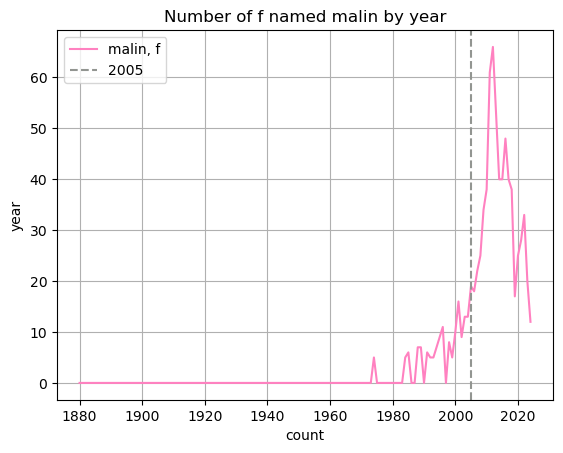

The first year with more than five of this start was 1974
The last year with more than five of this start was 1974
The name peaked in 2012 with 66
There have been a total of 824 babies named malin
The name increased from 1 to 12, a 1100.00% increase over 1880 to 2024


In [51]:
name, sex = name_input("name")
min_y, max_y = year_input()
year = single_year_input(min_y, max_y)
show = True
name_counts, ignore = name_counts_years(name, sex, year, min_y, max_y)
earliest_year = first_nonzero(name_counts, min_y)
latest_year = last_nonzero(name_counts, min_y)

total_sum = int(sum(name_counts))
percent_change, initial, final = calculate_percent_change(name_counts)
change_verb = "increase" if percent_change > 0 else "decrease"
percent_change = abs(percent_change)
color = female_color if sex == 'f' else male_color
peak_count_year, peak_count = peak_year(name_counts, min_y)
title = f"Number of {sex} named {name} by year"
label = f"{name}, {sex}"
make_graph(title, range(min_y, max_y), name_counts, year, label, color, True)

print(f"The first year with more than five of this start was {earliest_year}")
print(f"The last year with more than five of this start was {latest_year}")
print(f"The name peaked in {peak_count_year} with {peak_count}")
# print(f"In {year} there were {year_sum} {sex} babies given the name {name_sum} and its rank was {rank}")
print(f"There have been a total of {total_sum} babies named {name}")
print(f"The name {change_verb}d from {initial} to {final}, a {percent_change:.2f}% {change_verb} over {min_y} to {max_y - 1}")